In [2]:
# This file contains an experiment identifying a single influential point that can cause a sign flip,
# which AMIP fails to detect.
# Conclusion: this can occur when the data-point deviates far
# from the other points (in covariate space), drastically reducing variance in the remaining points.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from linear_regression import LinearRegression

In [3]:
def plot_regression(x, y, x1, y1, x2, y2):
    ## X vs Y
    plt.scatter(x1[0], y1, marker='o', color='black', label='Pop. A', s=56)
    plt.scatter(x2[0], y2, marker='x', color='r', label='Pop. B', s=56)
    # plt.title('One-dimensional Example')
    
    plt.xlabel('x', fontsize=22)  # Larger font for x-axis label
    plt.ylabel('y', fontsize=22)  # Larger font for y-axis label
    
    # Set the size of tick marks
    plt.xticks(fontsize=12)  # Larger ticks for x-axis
    plt.yticks(fontsize=12)  # Larger ticks for y-axis
    
    plt.legend(fontsize=22)

    plt.show()

    x = x.T
    lr = LinearRegression(x=x.T, y=y)
    lr.fit()
    print(
        f"Beta with full dataset: {lr.beta[0]}"
    )

    # Dropping just x1 should change the analysis (based on data generating process)
    modified_lr = LinearRegression(x=x2, y=y2) # Drop Pop_1 data
    modified_lr.fit()
    print(
        f"Beta with subset dropped: {modified_lr.beta[0]}"
    )
    
    return lr

def make_df(lr):
    # III. Compute influence scores and Newton scores for first coefficient.
    scores = -lr.influence_scores()[0] # after adding an intercept term, take the scores of coefficient 1.
    newton_scores = -lr.one_step_newton()[0]

    # sort indices in ascending order (influence scores are negative, so the largest magnitude scores appear first.)
    inds = np.argsort(scores)
    # print("inds", inds[:10])
    original_inds = inds # original_inds

    newton_inds = np.argsort(newton_scores)
    # print("newton inds", newton_inds[:10])
    original_newton_inds = newton_inds 

    # sort scores.
    sorted_scores = scores[inds]
    # print("sorted_scores", sorted(scores)[:10])
    original_sorted_scores = sorted_scores

    sorted_newton_scores = newton_scores[inds]
    # print("sorted_newton_scores", sorted_newton_scores[:10])
    original_sorted_newton_scores = sorted_newton_scores
    
    # influential point
    outlier_x = np.squeeze(x1[0][0])
    outlier_y = np.squeeze(y1[0][0])
    print(f"outlier_x: {outlier_x}")
    print(f"outlier_y: {outlier_y}")
    # residuals
    residuals = lr.residual()
    # print(f"outlier_residual: {round(residuals[0], 4)}")
    # leverages
    leverages = lr.leverage_scores()
    # print(f"outlier_leverage: {round(leverages[0], 4)}")
    # schmeverage e1
    shmeverage_e1 = lr.schmeverage_scores([(1,)])
    # print(f'schmeverage_e1: {round(shmeverage_e1[0], 4)}')
    # Compute influence functions for first coefficient
    scores = -lr.influence_scores()[0] # effect of removing a data point on beta1.
    # print("outlier influence score:", round(scores[0], 4))
    leverage_correction = 1 / (1 - leverages)


    # create a df with residuals, leverages, and coordinates.
    orig_df = pd.DataFrame({'x': x.flatten(), 'y':y.flatten(),
                            'residual': residuals, 'schmeverage': shmeverage_e1,
                            'leverage': leverages, 'leverage_correction': leverage_correction,
                            'influence': scores, 'newton': newton_scores})
    
    return orig_df

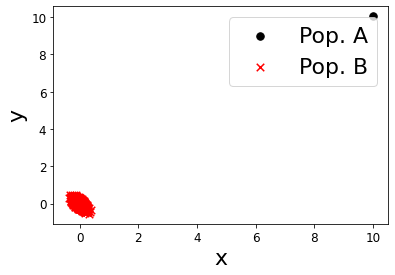

Beta with full dataset: [0.34967025]
Beta with subset dropped: [-0.99827176]
outlier_x: 10
outlier_y: 10.041440587671698


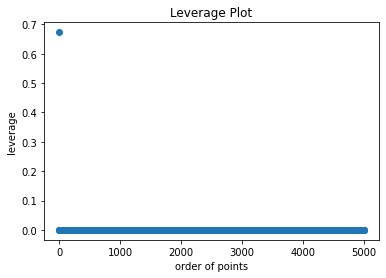

           x          y  residual  schmeverage  leverage  leverage_correction  \
0  10.000000  10.041441  6.544738     0.067316  0.673158             3.059581   
1   0.176405  -0.145433 -0.207117     0.001187  0.000209             1.000210   
2   0.040016  -0.113761 -0.127754     0.000269  0.000011             1.000011   
3   0.097874  -0.251566 -0.285789     0.000659  0.000064             1.000064   
4   0.224089  -0.280315 -0.358672     0.001508  0.000338             1.000338   

   influence    newton  
0  -0.440564 -1.347942  
1   0.000246  0.000246  
2   0.000034  0.000034  
3   0.000188  0.000188  
4   0.000541  0.000541  


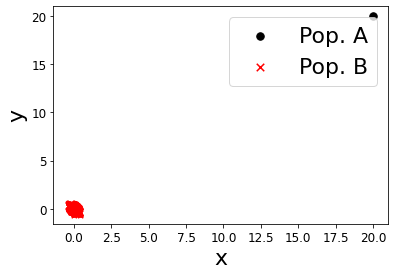

Beta with full dataset: [0.77760076]
Beta with subset dropped: [-1.00594992]
outlier_x: 20
outlier_y: 19.941896719337525


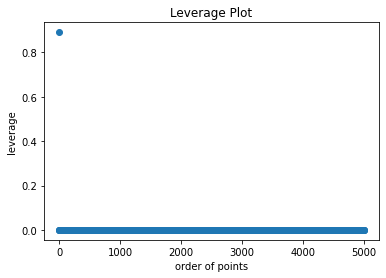

           x          y  residual  schmeverage      leverage  \
0  20.000000  19.941897  4.389881     0.044521  8.904198e-01   
1   0.129811  -0.149649 -0.250590     0.000289  3.751101e-05   
2  -0.020212   0.267210  0.282927    -0.000045  9.093700e-07   
3  -0.083323   0.142025  0.206817    -0.000185  1.545488e-05   
4   0.173360  -0.213095 -0.347900     0.000386  6.690102e-05   

   leverage_correction  influence    newton  
0             9.125735  -0.195442 -1.783551  
1             1.000038   0.000072  0.000072  
2             1.000001   0.000013  0.000013  
3             1.000015   0.000038  0.000038  
4             1.000067   0.000134  0.000134  


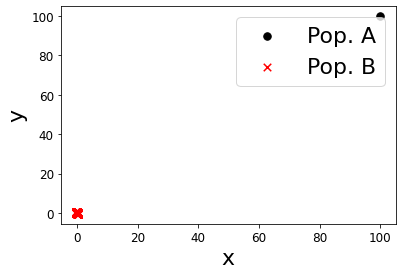

Beta with full dataset: [0.9896772]
Beta with subset dropped: [-0.99283038]
outlier_x: 100
outlier_y: 99.94393556859534


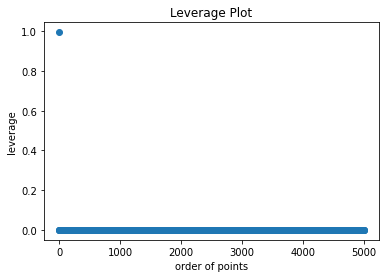

            x          y  residual   schmeverage      leverage  \
0  100.000000  99.943936  0.976216  9.951000e-03  9.951000e-01   
1   -0.105893  -0.070134  0.034667 -1.053742e-05  1.115841e-06   
2   -0.032653   0.076359  0.108674 -3.249284e-06  1.060984e-07   
3    0.033005  -0.002792 -0.035456  3.284287e-06  1.083965e-07   
4   -0.000048   0.014723  0.014770 -4.776275e-09  2.292514e-13   

   leverage_correction     influence        newton  
0           204.080907 -9.714322e-03 -1.982508e+00  
1             1.000001  3.652957e-07  3.652961e-07  
2             1.000000  3.531137e-07  3.531137e-07  
3             1.000000  1.164487e-07  1.164487e-07  
4             1.000000  7.054596e-11  7.054596e-11  


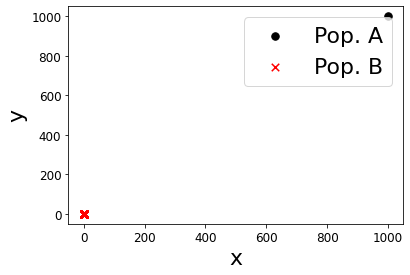

Beta with full dataset: [0.99979787]
Beta with subset dropped: [-1.03119887]
outlier_x: 1000
outlier_y: 999.9019043360779


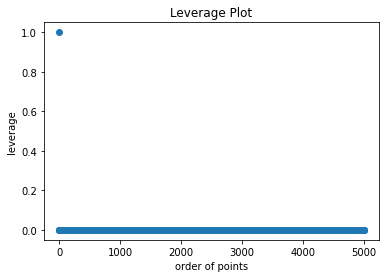

             x           y  residual   schmeverage      leverage  \
0  1000.000000  999.901904  0.104036  9.999488e-04  9.999488e-01   
1    -0.151128    0.046277  0.197374 -1.511199e-07  2.283839e-08   
2     0.097684   -0.084695 -0.182360  9.767938e-08  9.541750e-09   
3     0.125550    0.024569 -0.100956  1.255436e-07  1.576201e-08   
4     0.037123    0.001600 -0.035516  3.712131e-08  1.378062e-09   

   leverage_correction     influence        newton  
0         19523.095345 -1.040305e-04 -2.030997e+00  
1             1.000000  2.982710e-08  2.982710e-08  
2             1.000000  1.781279e-08  1.781279e-08  
3             1.000000  1.267434e-08  1.267434e-08  
4             1.000000  1.318393e-09  1.318393e-09  


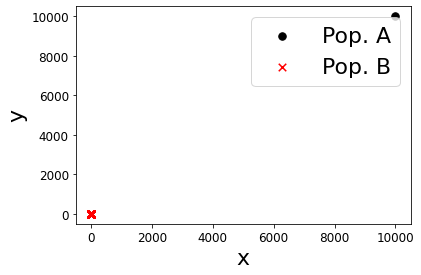

Beta with full dataset: [0.99999604]
Beta with subset dropped: [-0.99194589]
outlier_x: 10000
outlier_y: 9999.970169793554


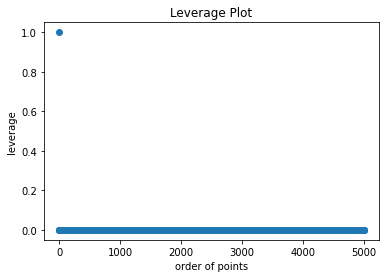

              x            y  residual   schmeverage      leverage  \
0  10000.000000  9999.970170  0.009758  9.999995e-05  9.999995e-01   
1      0.201111    -0.246942 -0.448052  2.011114e-09  4.044581e-10   
2      0.168986    -0.070753 -0.239738  1.689857e-09  2.855617e-10   
3      0.019997    -0.014745 -0.034742  1.999664e-10  3.998658e-12   
4     -0.122433     0.050749  0.173181 -1.224330e-09  1.498985e-10   

   leverage_correction     influence        newton  
0         2.041448e+06 -9.757497e-07 -1.991942e+00  
1         1.000000e+00  9.010840e-10  9.010840e-10  
2         1.000000e+00  4.051231e-10  4.051231e-10  
3         1.000000e+00  6.947187e-12  6.947187e-12  
4         1.000000e+00  2.120308e-10  2.120308e-10  


In [4]:
# Set seed before generating random numbers
np.random.seed(0)
num_dimensions = 1

num_observations_pop_1 = 1
num_observations_pop_2 = 4999

# set variance of pop. big
epsilon = 0.01
vars_pop_2 = [[epsilon]]

# set outlier
outlier_x_list = [[10], [20], [100], [1000], [10000]]

for outlier_x in outlier_x_list:
    x1 = np.expand_dims(outlier_x, axis=0)
    x2 = np.random.randn(1, num_observations_pop_2) * np.sqrt(vars_pop_2) # pop B
    # All x samples
    x = np.concatenate([x1, x2], axis=-1) 

    # generate y's.
    # True regression coefficients for both populations
    beta1 = [[1.0]]
    beta2 = [[-1.0]]
    # Generate Gaussian noise
    noise_stdev = 0.1
    epsilon1 = noise_stdev * np.random.randn(len(x1[0]), 1)
    epsilon2 = noise_stdev * np.random.randn(num_observations_pop_2, 1)
    # Generate observed values
    y1 = (x1.T @ beta1) + epsilon1
    y2 = (x2.T @ beta2) + epsilon2
    y = np.concatenate([y1, y2], axis=0)

    lr = plot_regression(x, y, x1, y1, x2, y2)

    orig_df = make_df(lr)
    ind = np.arange(0, 5000, 1)
    plt.scatter(ind, orig_df['leverage'])
    
    plt.xlabel("order of points")
    plt.ylabel('leverage')
    plt.title('Leverage Plot')
    plt.savefig(f'leverage-for-outlier-{outlier_x}')
    plt.show()
    
    
    
    
    print(orig_df[:5])

# Demo in Paper for X = 100

In [5]:
def create_orig_df(x, lr):
    '''
    x: design matrix.
    lr: linear regression object.
    '''
    scores = -lr.influence_scores()[1]
    newton_scores = -lr.one_step_newton()[1]

    # sort indices in ascending order (influence scores are negative, so the largest magnitude scores appear first.)
    inds = np.argsort(scores)
    print("inds", inds[:10])
    original_inds = inds # original_inds

    newton_inds = np.argsort(newton_scores)
    print("newton inds", newton_inds[:10])
    original_newton_inds = newton_inds 

    # sort scores.
    sorted_scores = scores[inds]
    print("sorted_scores", sorted(scores)[:10])
    original_sorted_scores = sorted_scores

    sorted_newton_scores = newton_scores[inds]
    print("sorted_newton_scores", sorted_newton_scores[:10])
    original_sorted_newton_scores = sorted_newton_scores

    # residuals
    residuals = lr.residual()
    # print("residuals", residuals[:10])
    # leverages
    leverages = lr.leverage_scores()
    # print("leverages", leverages[:10])

    # x's
    intercept = [pt[0] for pt in x]
    x1 = [pt[1] for pt in x]
    # x2 = [pt[2] for pt in x]

    # x1 = [pt[0] for pt in x]
    # x2 = [pt[1] for pt in x]

    # create a df with residuals, leverages, and coordinates.
    orig_df = pd.DataFrame({'x1': x1, 'y': y, 
                                      'residual': residuals, 'leverage': leverages, 
                            'influence': scores, 'newton': newton_scores})

In [6]:
np.expand_dims([100], axis=0) 

array([[100]])

In [7]:
# Generate Data
num_dimensions = 1
num_observations_pop_1 = 1
num_observations_pop_2 = 1000

# 
mean_pop_1 = np.array([1e6])
mean_pop_2 = np.array([0])

vars_pop_1 = np.array([[0]])
vars_pop_2 = [[1]]

# generate x's. May 20th
x1 = np.random.multivariate_normal(mean_pop_1, vars_pop_1, num_observations_pop_1)
x2 = np.random.multivariate_normal(mean_pop_2, vars_pop_2, num_observations_pop_2)

# x1 = np.expand_dims([100], axis=0) 
# print("ola", x1.shape)
# x2 = np.random.randn(1, num_observations_pop_2) * np.sqrt(vars_pop_2) # pop B
# ### x2 needs to be transposed to allow dimensions to match.
# x2 = x2.T
# ###
# print("ola2", x2.shape)

# All x samples
x = np.append(x1, x2, axis=0) 
print(x.shape)

# # generate the X values for two populations.
# x1 = np.random.multivariate_normal(mean_pop_1, vars_pop_1, num_observations_pop_1)
# x2 = np.random.multivariate_normal(mean_pop_2, vars_pop_2, num_observations_pop_2)
# x = np.append(x1, x2, axis=0) # All x samples
# print(x.shape)
x1_0 = [pt[0] for pt in x1]
# x1_1 = [pt[1] for pt in x1]
x2_0 = [pt[0] for pt in x2]
# x2_1 = [pt[1] for pt in x2]

# add intercept term.
df = pd.DataFrame(x)
df.insert(0, 'Ones', 1)
arr = df.values
x = arr
# (3/20: make sure that x1, x2 come from this new design matrix.)
x1 = x[:1]
x2 = x[1:]

print("x1", x1)
print("x2", x2)

# generate y's.
# True regression coefficients for both populations
beta1 = [[1.0]]
beta2 = [[-1.0]]
# Generate Gaussian noise
noise_stdev = 1
epsilon1 = noise_stdev * np.random.randn(len(x1[0]), 1)
epsilon2 = noise_stdev * np.random.randn(num_observations_pop_2, 1)
# # Generate observed values
# y1 = (x1.T @ beta1[0]) + epsilon1
# y2 = (x2.T @ beta2[0]) + epsilon2

# Generating the Y values.
epsilon1 = np.random.normal(0, noise_stdev, num_observations_pop_1) # eps is the variance of the noise distribution.
slope = 1
intercept = 0
y1 = []
for i in range(num_observations_pop_1):
    y1.append(slope*x1_0[i] + intercept + epsilon1[i]) # change here to add residual noise.

    
epsilon2 = np.random.normal(0, noise_stdev, num_observations_pop_2) # eps is the variance of the noise distribution.
slope = -1
intercept = 0
y2 = []
for i in range(num_observations_pop_2):
    y2.append(slope*x2_0[i] + intercept + epsilon2[i]) # change here to add residual noise.

y = np.concatenate([y1, y2], axis=0)
y

(1001, 1)
x1 [[1.e+00 1.e+06]]
x2 [[ 1.         -1.72057195]
 [ 1.         -0.25034177]
 [ 1.          0.58472799]
 ...
 [ 1.          0.51806731]
 [ 1.         -0.68364463]
 [ 1.         -1.65270558]]


array([ 9.99999586e+05,  3.59688627e+00,  1.42569493e+00, ...,
       -1.30667922e+00,  2.43867942e-01,  8.40348843e-01])

In [8]:
# II. Fit the regression.
lr = LinearRegression(x=x.T, y=y)
lr.fit()

print(
    f"Estimated beta1 with full dataset: {lr.beta[1]}"
)  # We care about first coefficient (pop A: y is perfectly correlated (slope=1) with x1.)

### V. CREATE DF
# orig_df, inds, scores, newton_inds, newton_scores = create_orig_df(x, lr)

scores = -lr.influence_scores()[1] # after adding an intercept term, take the scores of coefficient 1.
# sort indices in ascending order (influence scores are negative, so the largest magnitude scores appear first.)
inds = np.argsort(scores)
print("inds", inds[:10])

###
scores = -lr.influence_scores()[1]
newton_scores = -lr.one_step_newton()[1]

# sort indices in ascending order (influence scores are negative, so the largest magnitude scores appear first.)
inds = np.argsort(scores)
print("inds", inds[:10])
original_inds = inds # original_inds

newton_inds = np.argsort(newton_scores)
print("newton inds", newton_inds[:10])
original_newton_inds = newton_inds 

# sort scores.
sorted_scores = scores[inds]
print("sorted_scores", sorted(scores)[:10])
original_sorted_scores = sorted_scores

sorted_newton_scores = newton_scores[inds]
print("sorted_newton_scores", sorted_newton_scores[:10])
original_sorted_newton_scores = sorted_newton_scores

# residuals
residuals = lr.residual()
# print("residuals", residuals[:10])
# leverages
leverages = lr.leverage_scores()
# print("leverages", leverages[:10])

# x's
intercept = [pt[0] for pt in x]
x1 = [pt[1] for pt in x]
# x2 = [pt[2] for pt in x]

# x1 = [pt[0] for pt in x]
# x2 = [pt[1] for pt in x]

# create a df with residuals, leverages, and coordinates.
orig_df = pd.DataFrame({'x1': x1, 'y': y, 
                                  'residual': residuals, 'leverage': leverages, 
                        'influence': scores, 'newton': newton_scores})
###
orig_df

# print(f"amip additive scores: {sum(scores[:10])}")
# print(f'newton additive scores: {sum(newton_scores[:10])}')

Estimated beta1 with full dataset: 0.9999995129066036
inds [873 497 431 950 475 400 293 976 193 734]
inds [873 497 431 950 475 400 293 976 193 734]
newton inds [  0 873 497 431 950 475 400 293 976 193]
sorted_scores [-6.625190547065845e-09, -6.303186396297089e-09, -6.282999684930569e-09, -6.226996356965989e-09, -5.963357642791924e-09, -5.940475277401112e-09, -5.724816664737222e-09, -5.486986995311615e-09, -5.46517826281567e-09, -5.373372312128706e-09]
sorted_newton_scores [-6.63182234e-09 -6.30949586e-09 -6.28928894e-09 -6.23322956e-09
 -5.96932694e-09 -5.94642167e-09 -5.73054719e-09 -5.49247945e-09
 -5.47064889e-09 -5.37875104e-09]


,x1,y,residual,leverage,influence,newton
0,1000000.000000,999999.586092,0.001974,1.000,-1.973974e-09,-1.970676e+00
1,-1.720572,3.596886,5.246246,0.001,5.255189e-09,5.260450e-09
2,-0.250342,1.425695,1.604825,0.001,1.605199e-09,1.606806e-09
3,0.584728,-0.062073,-0.718013,0.001,-7.175798e-10,-7.182981e-10
4,-1.250827,3.419136,4.598751,0.001,4.604429e-09,4.609038e-09
...,...,...,...,...,...,...
996,1.760917,-1.037175,-2.869303,0.001,-2.864195e-09,-2.867062e-09
997,-1.216175,1.686217,2.831180,0.001,2.834577e-09,2.837414e-09
998,0.518067,-1.306679,-1.895958,0.001,-1.894941e-09,-1.896838e-09
999,-0.683645,0.243868,0.856301,0.001,8.568716e-10,8.577294e-10


In [9]:
# True Change in Fit.
0.9896772 - -0.99283038

1.98250758

In [10]:
# Refit after Removing Flagged Points
# AMIP inds [  0   5   1   3   6   7   4 775 237 405]
AMIP_inds= [154]
new_x_amip= np.delete(x, AMIP_inds, axis=0)
new_y_amip= np.delete(y, AMIP_inds, axis=0)
print(new_x_amip.shape)
print(new_y_amip.shape)

(1000, 2)
(1000,)


In [11]:
# Refit after removing the points specified by AMIP and Additive 1sN (these indices are the same).
lr = LinearRegression(x=x.T, y=y)
lr.fit()

print(
    f"Estimated beta1 with full dataset: {lr.beta[1]}"
)  # We care about first coefficient (pop A: y is perfectly correlated (slope=1) with x1.)

modified_lr_amip = LinearRegression(x=new_x_amip.T, y=new_y_amip)
modified_lr_amip.fit()
print(
    f"Estimated beta1 after removing subset specified by AMIP: {modified_lr_amip.beta[1]}"
)
print(
    f"Difference in quantities: {lr.beta[1] - modified_lr_amip.beta[1]}"
)

Estimated beta1 with full dataset: 0.9999995129066036
Estimated beta1 after removing subset specified by AMIP: 0.9999995114242071
Difference in quantities: 1.4823965388544025e-09


# Generate Plot

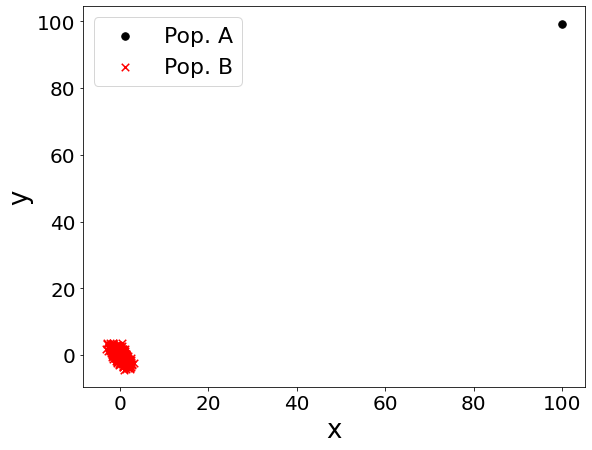

In [15]:
num_dimensions = 1
num_observations_pop_1 = 1
num_observations_pop_2 = 1001

# set variance of pop. big
vars_pop_2 = [[1]] # 0.01

# generate x's.
x1 = np.expand_dims([100], axis=0) # May 17th: the outlier position is -20.
x2 = np.random.randn(1, num_observations_pop_2) * np.sqrt(vars_pop_2) # pop B
# All x samples
x = np.concatenate([x1, x2], axis=-1) 

# generate y's.
# True regression coefficients for both populations
beta1 = [[1.0]]
beta2 = [[-1.0]]
# Generate Gaussian noise
noise_stdev = 1
epsilon1 = noise_stdev * np.random.randn(len(x1[0]), 1)
epsilon2 = noise_stdev * np.random.randn(num_observations_pop_2, 1)
# Generate observed values
y1 = (x1.T @ beta1) + epsilon1
y2 = (x2.T @ beta2) + epsilon2
y = np.concatenate([y1, y2], axis=0)

plt.figure(figsize=(9, 7))

# lr = plot_regression(x, y, x1, y1, x2, y2)
plt.scatter(x1[0], y1, marker='o', color='black', label='Pop. A', s=56)
plt.scatter(x2[0], y2, marker='x', color='r', label='Pop. B', s=56)
# plt.title('One-dimensional Example')

# ###

# # V. Plot Points Dropped

plt.xlabel('x', fontsize=26)  # Larger font for x-axis label
plt.ylabel('y', fontsize=26)  # Larger font for y-axis label

# # Set the size of tick marks
# plt.xticks(np.arange(0, 30, ), fontsize=20) # custom range of ticks.
# plt.yticks(np.arange(-3, 20, 5), fontsize=20)

# # plt.title('Simpson`s paradox', fontsize=22)
# plt.legend(fontsize=22)
# # plt.savefig('simpsons_paradox_may26.pdf')
# plt.show()
# ###

# Set the size of tick marks
plt.xticks(fontsize=20)  # Larger ticks for x-axis
plt.yticks(fontsize=20)  # Larger ticks for y-axis

plt.legend(fontsize=22)
plt.savefig('one_outlier_may26.pdf')
plt.show()


In [20]:
# Set seed before generating random numbers
np.random.seed(0)
# two dimensions, many observations
num_dimensions = 1
total_observations = 5000

num_observations_pop_1 = np.random.binomial(size=1, n=total_observations, p=alpha)[
    0
] # A (small fraction)
num_observations_pop_2 = total_observations - num_observations_pop_1 # B (large fraction)
print(
    f"Num observations from pop_1 and pop_2: {num_observations_pop_1, num_observations_pop_2}"
)

# variances
epsilon = 0.01 # pop. B
vars_pop_1 = [[64]] # Oct. 14th: var needs to be large to be influential. (var, amip, exact) = (2, 0.335, 0.428), (4, 0.45, 0.71), (8, 0.50, 1.05), (16, 0.42, 1.37), (32, 0.30, 1.6), (64, 0.18, 1.8)
vars_pop_2 = [[epsilon]] # (JYH: Oct 31: (distance, resid, leverage))


Num observations from pop_1 and pop_2: (0, 5000)


In [21]:
# Data is generated from two populations, one varies mostly along x2 and the other along x1
# We have very few observations of population 1. The effect of the first coefficient (variable of interest)
# Has opposite signs in each population. We would like to flag that something funny is going on.
# However, AMIP as currently designed fails.
# x1 = np.random.randn(1, num_observations_pop_1) * np.sqrt(vars_pop_1)
# print("dim(x1) \n", x1.shape)
# # print(x1)
# ### Oct 14th: retrieving only the smallest and largest x-values.
# x1 = np.sort(x1[0])
# # print(x1)
# ### CHANGE POP. A HERE
# # x1 = np.concatenate([x1[:1], x1[-1:]], axis=None) # Oct. 24th: take 2 maximum points.
# x1 = np.concatenate([x1[:1]], axis=None)
x1 = [-24]
###
print("outlier x1:", x1)
x1 = np.expand_dims(x1, axis=0)
###

x2 = np.random.randn(1, num_observations_pop_2) * np.sqrt(vars_pop_2) # pop B
x = np.concatenate([x1, x2], axis=-1)  # All x samples

print(
    f"Num observations from pop_1 and pop_2: {len(x1[0]), len(x2[0])}"
)

outlier x1: [-24]
Num observations from pop_1 and pop_2: (1, 5000)


In [23]:
# True regression coefficients for both populations
beta1 = [[-1.0]]
beta2 = [[1.0]]

# Generate Gaussian noise
noise_stdev = 0.1
epsilon1 = noise_stdev * np.random.randn(len(x1[0]), 1)
epsilon2 = noise_stdev * np.random.randn(num_observations_pop_2, 1)

# Generate observed values
y1 = (x1.T @ beta1) + epsilon1
y2 = (x2.T @ beta2) + epsilon2
y = np.concatenate([y1, y2], axis=0)  # All y samples

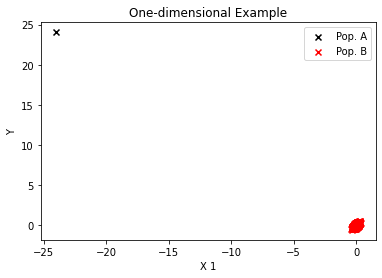

Beta with full dataset: [-0.84275012]
Beta with subset dropped: [1.02150249]


In [24]:
## X vs Y
plt.scatter(x1[0], y1, marker='x', color='black', label='Pop. A')
plt.scatter(x2[0], y2, marker='x', color='r', label='Pop. B')
plt.title('One-dimensional Example')
plt.xlabel('X 1')
plt.ylabel('Y')
plt.legend()

plt.show()

x = x.T
lr = LinearRegression(x=x.T, y=y)
lr.fit()
print(
    f"Beta with full dataset: {lr.beta[0]}"
)

# Dropping just x1 should change the analysis (based on data generating process)
modified_lr = LinearRegression(x=x2, y=y2) # Drop Pop_1 data
modified_lr.fit()
print(
    f"Beta with subset dropped: {modified_lr.beta[0]}"
)

In [34]:
### 4/06: Statistics of the outlier.
# influential point
outlier_x = np.squeeze(x1[0][0])
outlier_y = np.squeeze(y1[0][0])
print(f"outlier_x: {outlier_x}")
print(f"outlier_y: {outlier_y}")
# residuals
residuals = lr.residual()
print(f"outlier_residual: {round(residuals[0], 4)}")
# leverages
leverages = lr.leverage_scores()
print(f"outlier_leverage: {round(leverages[0], 4)}")
# schmeverage e1
shmeverage_e1 = lr.schmeverage_scores([(1,)])
print(f'schmeverage_e1: {round(shmeverage_e1[0], 4)}')
# Compute influence functions for first coefficient
scores = -lr.influence_scores()[0] # effect of removing a data point on beta1.
print("outlier influence score:", round(scores[0], 4))

outlier_x: -24
outlier_y: 24.041440587671698
outlier_residual: 3.738
outlier_leverage: 0.9223
schmeverage_e1: -0.0384
outlier influence score: 0.1436


In [35]:
# Get indices that sort them in ascending order
inds = (-scores).argsort() # Oct 14: We would like to increase the coefficient. Hence, sort from large to small.

sorted_scores = scores[inds]
print("amip sorted influence score: \n", sorted_scores[:10])

# Clip the ones that are smaller than 0. We only want to increase the coefficient. (all the points in A do this)
sorted_clipped_scores = [s for s in sorted_scores if s > 0]
# print(
#     f"Influence scores clipped: {sorted_clipped_scores[:2]}"
# )

# Estimate the effect of dropping betas using the scores
estimated_new_betas = lr.beta[0] + np.cumsum(sorted_clipped_scores) # list where each val is the beta produced by dropping the sorted datapoints up until that index.
print(
    f"estimated_new_betas: {estimated_new_betas[:10]}"
)

amip sorted influence score: 
 [1.43642762e-01 1.92320280e-05 1.87558268e-05 1.84275365e-05
 1.74791675e-05 1.65168369e-05 1.49983299e-05 1.48819734e-05
 1.37905418e-05 1.36479518e-05]
estimated_new_betas: [-0.70233289 -0.70231366 -0.7022949  -0.70227648 -0.702259   -0.70224248
 -0.70222748 -0.7022126  -0.70219881 -0.70218516]


In [36]:
# III. Compute influence scores and Newton scores for first coefficient.
scores = -lr.influence_scores()[0] # after adding an intercept term, take the scores of coefficient 1.
newton_scores = -lr.one_step_newton()[0]

# sort indices in ascending order (influence scores are negative, so the largest magnitude scores appear first.)
inds = np.argsort(scores)
print("inds", inds[:10])
original_inds = inds # original_inds

newton_inds = np.argsort(newton_scores)
print("newton inds", newton_inds[:10])
original_newton_inds = newton_inds 

# sort scores.
sorted_scores = scores[inds]
print("sorted_scores", sorted(scores)[:10])
original_sorted_scores = sorted_scores

sorted_newton_scores = newton_scores[inds]
print("sorted_newton_scores", sorted_newton_scores[:10])
original_sorted_newton_scores = sorted_newton_scores


# x's
# x1 = [pt[0] for pt in x]
# x2 = [pt[1] for pt in x]

# create a df with residuals, leverages, and coordinates.
orig_df = pd.DataFrame({'x': x.flatten(), 'y':y.flatten(),
                        'residual': residuals, 'schmeverage': shmeverage_e1,
                        'leverage': leverages,
                        'influence': scores, 'newton': newton_scores})
orig_df[:10]

inds [3119 3753 1055  686 3448  272 1419 1584 1257 2019]
newton inds [3119 3753 1055  686 3448  272 1419 1584 1257 2019]
sorted_scores [-0.0004535278523131146, -0.00044587606022355834, -0.0003370621225976065, -0.00033654945065157097, -0.00029933660622220696, -0.0002964034311418252, -0.00028922894254097153, -0.0002879178561237484, -0.0002876645289577497, -0.0002802550076860853]
sorted_newton_scores [-0.00045363 -0.00044598 -0.00033712 -0.00033659 -0.00029939 -0.00029644
 -0.00028927 -0.00028795 -0.0002877  -0.0002803 ]


,x,y,residual,schmeverage,leverage,influence,newton
0,-24.000000,24.041441,3.738025,-0.038427,9.222588e-01,1.436428e-01,1.847704e+00
1,0.176405,0.207378,0.356612,0.000282,4.982568e-05,-1.007251e-04,-1.007302e-04
2,0.040016,-0.033730,0.000122,0.000064,2.563844e-06,-7.844010e-09,-7.844031e-09
3,0.097874,-0.055818,0.026981,0.000157,1.533780e-05,-4.228140e-06,-4.228205e-06
4,0.224089,0.167864,0.357438,0.000359,8.040307e-05,-1.282485e-04,-1.282588e-04
5,0.186756,0.026805,0.184796,0.000299,5.584426e-05,-5.525809e-05,-5.526118e-05
6,-0.097728,-0.015289,-0.097964,-0.000156,1.529208e-05,-1.532906e-05,-1.532929e-05
7,0.095009,0.344157,0.424533,0.000152,1.445301e-05,-6.458110e-05,-6.458203e-05
8,-0.015136,0.086050,0.073245,-0.000024,3.668061e-07,1.775062e-06,1.775062e-06
9,-0.010322,-0.038446,-0.047178,-0.000017,1.705880e-07,-7.796981e-07,-7.796983e-07
